<a href="https://colab.research.google.com/github/MPramodhkumar/project-repo/blob/main/Image_Classification_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification using Convolutional Neural Networks (CNNs)**

Description:

The project involves building an image classification system using Convolutional Neural Networks
(CNNs). CNNs are widely used for image-related tasks and have achieved remarkable success in
various domains. This project will allow students to gain hands-on experience with deep
learning, image processing, and model development.

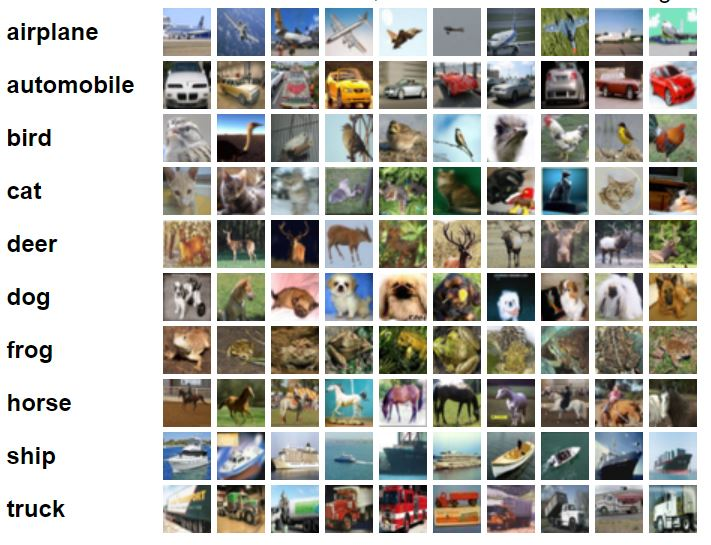

In [ ]:
#Dataset
#The CIFAR-10 dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (25,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

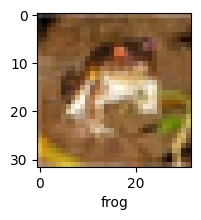

In [ ]:
plot_sample(X_train, y_train, 0)

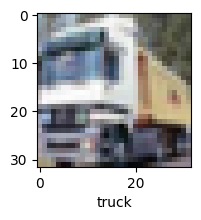

In [ ]:
plot_sample(X_train, y_train, 1)

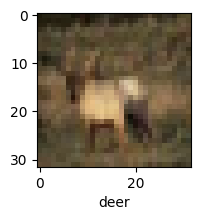

In [ ]:
plot_sample(X_train, y_train, 3)

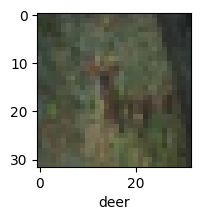

In [ ]:
plot_sample(X_train, y_train, 10)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

## Normalizing the training data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 4ms/step - loss: 1.8111 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6221 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5394 - accuracy: 0.4582
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4799 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4315 - accuracy: 0.4961


You can see that at the end of 5 epochs, accuracy is at around 49%

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.41      0.47      1000
           1       0.50      0.72      0.59      1000
           2       0.41      0.33      0.36      1000
           3       0.38      0.29      0.33      1000
           4       0.45      0.39      0.42      1000
           5       0.45      0.28      0.35      1000
           6       0.66      0.33      0.44      1000
           7       0.38      0.73      0.50      1000
           8       0.45      0.76      0.57      1000
           9       0.62      0.43      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



# Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 5ms/step - loss: 1.4327 - accuracy: 0.4888
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0954 - accuracy: 0.6188
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9661 - accuracy: 0.6639
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8790 - accuracy: 0.6948
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8110 - accuracy: 0.7192
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7532 - accuracy: 0.7375
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6982 - accuracy: 0.7571
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6551 - accuracy: 0.7715
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6098 - accuracy: 0.7851
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.56

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9637 - accuracy: 0.6982


[0.9637478590011597, 0.698199987411499]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[4.0494975e-05, 4.8000085e-05, 2.0910124e-04, 9.8575300e-01,
        1.9410800e-04, 9.0610860e-03, 4.3689739e-03, 3.3656897e-06,
        3.2174954e-04, 2.7413361e-07],
       [6.1057024e-03, 5.5605830e-03, 2.7391181e-05, 1.5572783e-05,
        3.2466201e-06, 1.0667966e-08, 4.1498499e-08, 2.9817304e-08,
        9.8742592e-01, 8.6148357e-04],
       [1.1723468e-01, 1.3784905e-01, 4.9141305e-04, 2.4250671e-02,
        9.7760616e-04, 7.1028789e-04, 6.4337156e-03, 9.6333091e-04,
        6.9263518e-01, 1.8454084e-02],
       [9.9528801e-01, 1.0525001e-03, 5.5750652e-04, 2.8085234e-04,
        9.3923562e-04, 3.4270755e-07, 9.8385144e-06, 2.0067152e-06,
        1.8327879e-03, 3.6859910e-05],
       [1.2154706e-07, 7.1947983e-07, 3.1786989e-02, 9.6120490e-03,
        2.1780838e-01, 7.2407036e-04, 7.4006593e-01, 1.5328261e-06,
        2.6437744e-08, 2.6413363e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

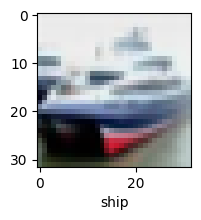

In [ ]:
plot_sample(X_test, y_test,1)

In [ ]:
classes[y_classes[1]]

'ship'

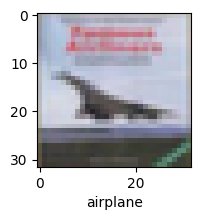

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

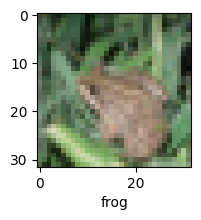

In [ ]:
plot_sample(X_test, y_test,4)

In [ ]:
classes[y_classes[4]]

'frog'

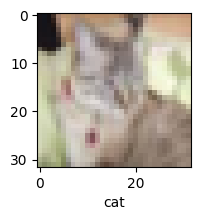

In [ ]:
plot_sample(X_test, y_test,8)

In [ ]:
classes[y_classes[8]]

'cat'

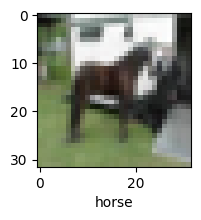

In [ ]:
plot_sample(X_test, y_test,20)

In [ ]:
classes[y_classes[20]]

'horse'

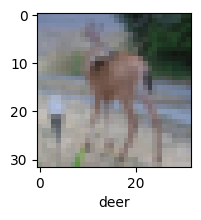

In [ ]:
plot_sample(X_test, y_test,100)

In [ ]:
classes[y_classes[100]]

'deer'